<a href="https://colab.research.google.com/github/ElevnthKuria/EDA_wth_Python_and_R/blob/main/EDA_%26_Modelling_with_Py_and_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Exploratory Data Analysis and Modelling in Python and R</h1>
 
 Steps

> I. Data Visualization

> II. Labelling Trees

> III. Modelling in R

> IV. 






# Introduction 


The datset we are using is from Duke University on the growth of trees within Duke Forest. We want to infer what variables leed to tree growth from the data set.

<h2>Import Libraries</h2>

In [1]:
import pandas as pd
pd.set_option('display.max_rows', 100)
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%load_ext rpy2.ipython

# Exploratory Data Analysis


In [2]:
#import the data into a panda Dataframe
df = pd.read_csv('datatrees.csv')
df.head(5)

,Unnamed: 0,ID,yr,cm,annualprec,summerpdsi,wintertemp
0,1,290.0,1998.0,4.0,1.7650,-0.7950,5.633333
1,2,290.0,2002.0,4.4,1.8056,-1.0550,5.400000
2,3,290.0,2004.0,4.8,1.8532,-0.7950,5.100000
3,4,290.0,2006.0,5.1,1.4533,-2.0425,5.666667
4,5,290.0,2008.0,5.3,1.5392,-2.4700,4.833333


In [3]:
df['ID'].nunique()

88

In [4]:
df['yr'].value_counts().sort_index()

1998.0    67
2002.0    68
2004.0    69
2006.0    64
2007.0    15
2008.0    77
2010.0    77
2011.0    74
Name: yr, dtype: int64

In [5]:
df.sort_values(by = ['yr', 'ID'])
df['cm_growth'] = df.groupby(['ID'])['cm'].pct_change()
df


,Unnamed: 0,ID,yr,cm,annualprec,summerpdsi,wintertemp,cm_growth
0,1,290.0,1998.0,4.0,1.7650,-0.7950,5.633333,NaN
1,2,290.0,2002.0,4.4,1.8056,-1.0550,5.400000,0.100000
2,3,290.0,2004.0,4.8,1.8532,-0.7950,5.100000,0.090909
3,4,290.0,2006.0,5.1,1.4533,-2.0425,5.666667,0.062500
4,5,290.0,2008.0,5.3,1.5392,-2.4700,4.833333,0.039216
...,...,...,...,...,...,...,...,...
508,509,729.0,2010.0,26.5,1.4914,-1.5675,2.033333,0.003788
509,510,729.0,2011.0,26.3,2.0694,-0.3875,5.133333,-0.007547
510,511,730.0,1998.0,7.7,1.7650,-0.7950,5.633333,NaN
511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# I. Data Visualization

<h2>Correlation Heatmap</h2>

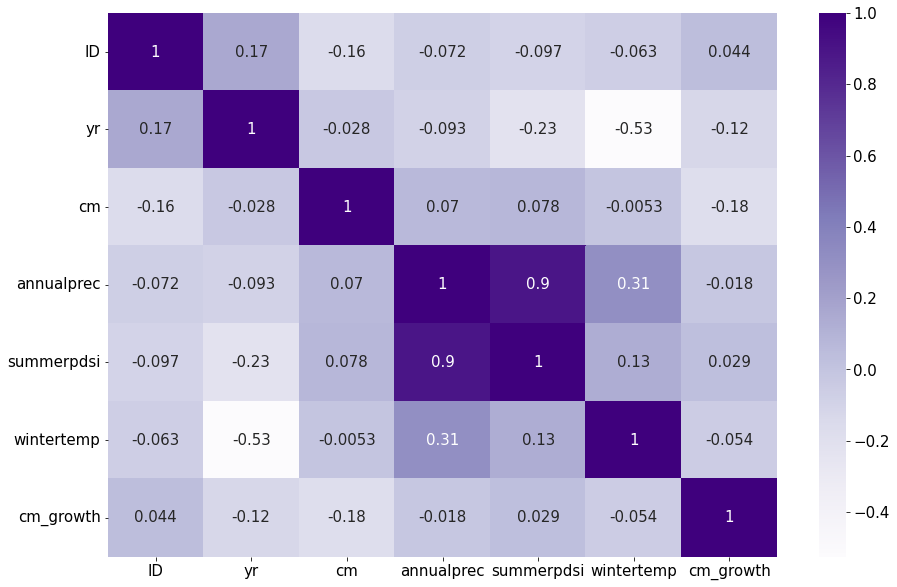

In [6]:
plt.rcParams.update({'font.size':15})
plt.rcParams['figure.figsize'] = 15, 10

corr_matrix = df.corr()
fig1 = sns.heatmap(corr_matrix, annot = True, cmap = 'Purples')

<h2>Pair Plot</h2>

In [7]:
fig2 = sns.pairplot

<h2>Histogram</h2>

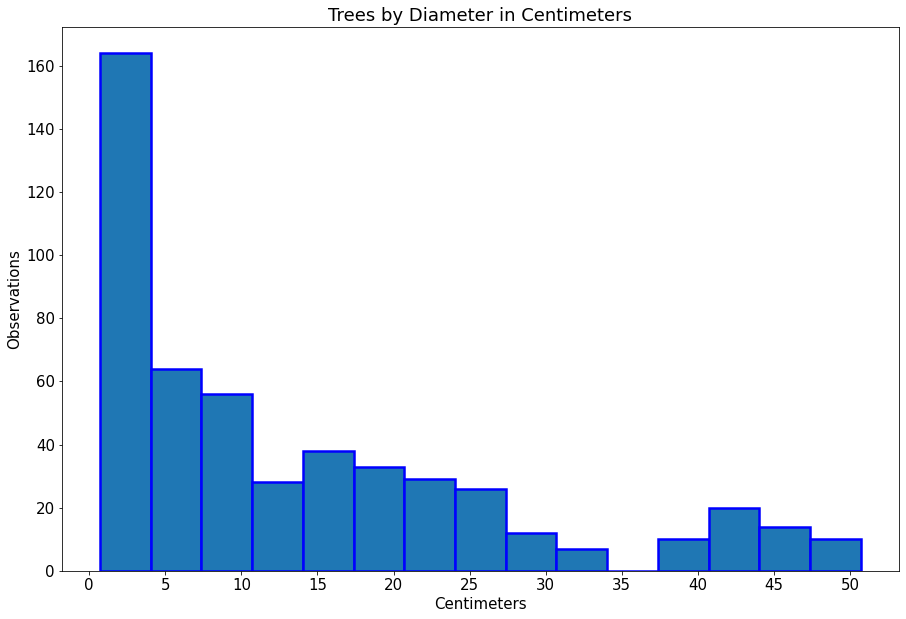

In [8]:
plt.hist(x = df['cm'], lw = 2.5, edgecolor = 'blue', bins = 15)
plt.xticks(np.arange(0, round(df['cm'].max()+1), 5))
plt.xlabel('Centimeters')
plt.ylabel('Observations')
plt.title('Trees by Diameter in Centimeters');

In [9]:
df['cm'].mean()

13.797455968688844

# II. Labelling
This Section categories the trees according to their sizes such as seedlings(<=2.54), saplings(>2.54 & >12.45), poletimbers(>12.54 & <=22.4), and sawtimbers(>22.4)

In [10]:
conditions = [(df['cm'] <= 2.54), (df['cm'] > 2.54) & (df['cm'] <= 12.45), (df['cm'] >12.45) & (df['cm'] <= 22.6), (df['cm'] > 22.6)]

values = ['Seedlings', 'Saplings', 'Poletimbers', 'Sawtimbers']

df['Tree_Size_Category'] = np.select(conditions, values)
df

,Unnamed: 0,ID,yr,cm,annualprec,summerpdsi,wintertemp,cm_growth,Tree_Size_Category
0,1,290.0,1998.0,4.0,1.7650,-0.7950,5.633333,NaN,Saplings
1,2,290.0,2002.0,4.4,1.8056,-1.0550,5.400000,0.100000,Saplings
2,3,290.0,2004.0,4.8,1.8532,-0.7950,5.100000,0.090909,Saplings
3,4,290.0,2006.0,5.1,1.4533,-2.0425,5.666667,0.062500,Saplings
4,5,290.0,2008.0,5.3,1.5392,-2.4700,4.833333,0.039216,Saplings
...,...,...,...,...,...,...,...,...,...
508,509,729.0,2010.0,26.5,1.4914,-1.5675,2.033333,0.003788,Sawtimbers
509,510,729.0,2011.0,26.3,2.0694,-0.3875,5.133333,-0.007547,Sawtimbers
510,511,730.0,1998.0,7.7,1.7650,-0.7950,5.633333,NaN,Saplings
511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


# <h2>Scatter Plots</h2>

<h2></h2>

In [11]:

px.scatter(data_frame = df, x = 'summerpdsi', y='cm', color = 'Tree_Size_Category', trendline = 'ols')


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [12]:

px.scatter(data_frame = df, x = 'summerpdsi', y='cm_growth', color = 'Tree_Size_Category', trendline = 'ols')


In [13]:

px.scatter(data_frame = df, x = 'wintertemp', y='cm', color = 'Tree_Size_Category', trendline = 'ols')


In [14]:

px.scatter(data_frame = df, x = 'wintertemp', y='cm_growth', color = 'Tree_Size_Category', trendline = 'ols')


In [15]:
df_tree_categories = df.groupby(['Tree_Size_Category', 'yr']).mean()
df_tree_categories.drop(columns = ['ID', 'cm_growth'], inplace = True)
df_tree_categories.reset_index(inplace= True)
#growth rate annualized
df_tree_categories['cm_growth'] = df_tree_categories.groupby(['Tree_Size_Category'])['cm'].pct_change()
df_tree_categories['yr_difference'] = df_tree_categories.groupby(['Tree_Size_Category'])['yr'].diff()
df_tree_categories['cm_growth'] = df_tree_categories['cm_growth']/df_tree_categories['yr_difference']
df_tree_categories

,Tree_Size_Category,yr,cm,annualprec,summerpdsi,wintertemp,cm_growth,yr_difference
0,Poletimbers,1998.0,16.084615,1.7650,-0.7950,5.633333,NaN,NaN
1,Poletimbers,2002.0,16.313333,1.8056,-1.0550,5.400000,0.003555,4.0
2,Poletimbers,2004.0,16.787500,1.8532,-0.7950,5.100000,0.014533,2.0
3,Poletimbers,2006.0,17.000000,1.4533,-2.0425,5.666667,0.006329,2.0
4,Poletimbers,2008.0,17.420000,1.5392,-2.4700,4.833333,0.012353,2.0
5,Poletimbers,2010.0,17.414286,1.4914,-1.5675,2.033333,-0.000164,2.0
6,Poletimbers,2011.0,17.407692,2.0694,-0.3875,5.133333,-0.000379,1.0
7,Saplings,1998.0,6.770370,1.7650,-0.7950,5.633333,NaN,NaN
8,Saplings,2002.0,6.315385,1.8056,-1.0550,5.400000,-0.016801,4.0
9,Saplings,2004.0,6.359259,1.8532,-0.7950,5.100000,0.003474,2.0


In [16]:
fig3 = px.scatter(data_frame = df_tree_categories, x = 'summerpdsi', y = 'cm', color = 'Tree_Size_Category', trendline = 'ols')
fig3

In [17]:
results = px.get_trendline_results(fig3)
print(results)

results.query("Tree_Size_Category == 'Seedlings'").px_fit_results.iloc[0].summary()

  Tree_Size_Category                                     px_fit_results
0        Poletimbers  <statsmodels.regression.linear_model.Regressio...
1           Saplings  <statsmodels.regression.linear_model.Regressio...
2         Sawtimbers  <statsmodels.regression.linear_model.Regressio...
3          Seedlings  <statsmodels.regression.linear_model.Regressio...


/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=8



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.178
Method:                 Least Squares   F-statistic:                     2.512
Date:                Mon, 04 Jul 2022   Prob (F-statistic):              0.164
Time:                        03:22:03   Log-Likelihood:              -0.094321
No. Observations:                   8   AIC:                             4.189
Df Residuals:                       6   BIC:                             4.348
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0631      0.207      9.985      0.000       1.558       2.569
x1             0.1919      0.121      1.585      0.164      -0.104       0.488
==============================================================================
Omnibus:                        0.147   Durbin-Watson:                   1.773
Prob(Omnibus):                  0.929   Jarque-Bera (JB):                0.109
Skew:                           0.090   Prob(JB):                        0.947
Kurtosis:                       2.458   Cond. No.                         4.52
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
fig4 = px.scatter(data_frame = df, x = 'summerpdsi', y = 'cm', color = 'Tree_Size_Category', trendline = 'ols')
fig4

In [19]:
results = px.get_trendline_results(fig4)
print(results)

results.query("Tree_Size_Category == 'Seedlings'").px_fit_results.iloc[0].summary()

  Tree_Size_Category                                     px_fit_results
0           Saplings  <statsmodels.regression.linear_model.Regressio...
1         Sawtimbers  <statsmodels.regression.linear_model.Regressio...
2          Seedlings  <statsmodels.regression.linear_model.Regressio...
3        Poletimbers  <statsmodels.regression.linear_model.Regressio...


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     7.852
Date:                Mon, 04 Jul 2022   Prob (F-statistic):            0.00595
Time:                        03:22:03   Log-Likelihood:                -99.260
No. Observations:                 118   AIC:                             202.5
Df Residuals:                     116   BIC:                             208.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9953      0.110     18.136      0.000       1.777       2.213
x1             0.1731      0.062      2.802      0.006       0.051       0.295
==============================================================================
Omnibus:                       69.402   Durbin-Watson:                   1.814
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                8.391
Skew:                          -0.096   Prob(JB):                       0.0151
Kurtosis:                       1.708   Cond. No.                         4.74
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
df_cm = df_tree_categories.drop(columns = ['cm_growth', 'yr_difference'])
df_cm_growth = df_tree_categories.drop(columns = ['cm', 'yr_difference'])
df_cm_growth.dropna(inplace = True)

In [21]:
df_cm.to_csv('df_cm.csv', index = False)
df_cm_growth.to_csv('df_cm_growth.csv', index = False)

# III. Modelling in R


In [22]:
%%R
devtools::install_github("dustinfife/flexplot")
install.packages("Metrics")

#read in packages
library(flexplot)
library(lme4)
library(Metrics)

R[write to console]: Downloading GitHub repo dustinfife/flexplot@HEAD



These packages have more recent versions available.
It is recommended to update all of them.
Which would you like to update?

1: All                            
2: CRAN packages only             
3: None                           
4: rlang   (1.0.2 -> 1.0.3) [CRAN]
5: pkgload (1.2.4 -> 1.3.0) [CRAN]

Enter one or more numbers, or an empty line to skip updates: 1
zoo         (NA    -> 1.8-10   ) [CRAN]
sandwich    (NA    -> 3.0-2    ) [CRAN]
TH.data     (NA    -> 1.1-1    ) [CRAN]
multcomp    (NA    -> 1.4-19   ) [CRAN]
mvtnorm     (NA    -> 1.1-3    ) [CRAN]
modeltools  (NA    -> 0.2-23   ) [CRAN]
matrixStats (NA    -> 0.62.0   ) [CRAN]
libcoin     (NA    -> 1.0-9    ) [CRAN]
Rcpp        (NA    -> 1.0.8.3  ) [CRAN]
rlang       (1.0.2 -> 1.0.3    ) [CRAN]
pkgload     (1.2.4 -> 1.3.0    ) [CRAN]
coin        (NA    -> 1.4-2    ) [CRAN]
strucchange (NA    -> 1.5-3    ) [CRAN]
RcppEigen   (NA    -> 0.3.3.9.2) [CRAN]
nloptr      (NA    -> 2.0.3    ) [CRAN]
minqa       (NA    -> 1.2.4    ) [C

R[write to console]: Installing 22 packages: zoo, sandwich, TH.data, multcomp, mvtnorm, modeltools, matrixStats, libcoin, Rcpp, rlang, pkgload, coin, strucchange, RcppEigen, nloptr, minqa, party, lme4, ggsci, patchwork, plyr, cowplot

R[write to console]: Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/zoo_1.8-10.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 808943 bytes (789 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[w

* checking for file ‘/tmp/RtmpgzWCrD/remotes3b4008726c/dustinfife-flexplot-b71a79a/DESCRIPTION’ ... OK
* preparing ‘flexplot’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘flexplot_0.13.3.tar.gz’



R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/Metrics_0.1.4.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 14898 bytes (14 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]

In [23]:
%%R
df_cm <- read.csv('df_cm.csv')
df_cm_growth <- read.csv('df_cm_growth.csv')
df_cm

   Tree_Size_Category   yr        cm annualprec summerpdsi wintertemp
1         Poletimbers 1998 16.084615     1.7650    -0.7950   5.633333
2         Poletimbers 2002 16.313333     1.8056    -1.0550   5.400000
3         Poletimbers 2004 16.787500     1.8532    -0.7950   5.100000
4         Poletimbers 2006 17.000000     1.4533    -2.0425   5.666667
5         Poletimbers 2008 17.420000     1.5392    -2.4700   4.833333
6         Poletimbers 2010 17.414286     1.4914    -1.5675   2.033333
7         Poletimbers 2011 17.407692     2.0694    -0.3875   5.133333
8            Saplings 1998  6.770370     1.7650    -0.7950   5.633333
9            Saplings 2002  6.315385     1.8056    -1.0550   5.400000
10           Saplings 2004  6.359259     1.8532    -0.7950   5.100000
11           Saplings 2006  6.408696     1.4533    -2.0425   5.666667
12           Saplings 2007  2.600000     1.2303    -2.8350   5.866667
13           Saplings 2008  6.343478     1.5392    -2.4700   4.833333
14           Sapling

In [25]:
%%R
explanatory_variables <- names(df_cm)
explanatory_variables <- explanatory_variables[-c(1, 3)]
explanatory_variables

[1] "yr"         "annualprec" "summerpdsi" "wintertemp"


In [33]:
%%R
#code from StachOverflow
n <- length(explanatory_variables)

id <- unlist(
        lapply(1:n,
            function(i)combn(1:n,i,simplify=FALSE)
    )
    ,recursive=FALSE)

Formulas <- sapply(id, function(i)
              paste("cm~", paste(explanatory_variables[i], collapse="+"))
            )
#model out exhaustively all possible mulitple linear regression models for the explanatory variables
linear_models = lapply(Formulas, function(i)
    lm(as.formula(i), data = df_cm))

linear_models_summaries = lapply(linear_models, summary)

linear_models_summaries

[[1]]

Call:
lm(formula = as.formula(i), data = df_cm)

Residuals:
    Min      1Q  Median      3Q     Max 
-12.841 -11.808  -7.478   3.534  21.251 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)
(Intercept)   91.2958  1150.9980   0.079    0.937
yr            -0.0385     0.5739  -0.067    0.947

Residual standard error: 13.02 on 28 degrees of freedom
Multiple R-squared:  0.0001607,	Adjusted R-squared:  -0.03555 
F-statistic: 0.004502 on 1 and 28 DF,  p-value: 0.947


[[2]]

Call:
lm(formula = as.formula(i), data = df_cm)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.249 -10.160  -6.158   4.659  22.113 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)    1.981     17.027   0.116    0.908
annualprec     7.201     10.044   0.717    0.479

Residual standard error: 12.9 on 28 degrees of freedom
Multiple R-squared:  0.01803,	Adjusted R-squared:  -0.01704 
F-statistic: 0.514 on 1 and 28 DF,  p-value: 0.4794


[[3]]

Call:
lm(formula = as

In [39]:
%%R
Formulas <- sapply(id,function(i)
              paste("cm~", paste(explanatory_variables[i],collapse="+"), '+(1|Tree_Size_Category)')
              )

#model out exhaustively all possible mixed effects models
mixed_models = lapply(Formulas, function(i)
    lmer(as.formula(i),data = df_cm))

mixed_models_summaries = lapply(mixed_models, summary)

mixed_models_summaries

[[1]]
Linear mixed model fit by REML ['lmerMod']
Formula: cm ~ yr + (1 | Tree_Size_Category)
   Data: df_cm

REML criterion at convergence: 100.9

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.1522 -0.2824  0.3338  0.5101  1.1756 

Random effects:
 Groups             Name        Variance Std.Dev.
 Tree_Size_Category (Intercept) 214.1440 14.6337 
 Residual                         0.6616  0.8134 
Number of obs: 30, groups:  Tree_Size_Category, 4

Fixed effects:
             Estimate Std. Error t value
(Intercept) -21.59007   72.30002  -0.299
yr            0.01814    0.03586   0.506

Correlation of Fixed Effects:
   (Intr)
yr -0.995

[[2]]
Linear mixed model fit by REML ['lmerMod']
Formula: cm ~ annualprec + (1 | Tree_Size_Category)
   Data: df_cm

REML criterion at convergence: 91.1

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.7548 -0.1736  0.0492  0.6688  1.0360 

Random effects:
 Groups             Name        Variance Std.Dev.
 Tree_Size_Category (I

<h2>Model Selection Tool: Bayesioan Information Criterion(BIC)</h2>

In [40]:
%%R
lapply(linear_models, BIC)

[[1]]
[1] 247.2547

[[2]]
[1] 246.7139

[[3]]
[1] 246.7532

[[4]]
[1] 247.1369

[[5]]
[1] 250.1148

[[6]]
[1] 250.1426

[[7]]
[1] 250.4567

[[8]]
[1] 250.1069

[[9]]
[1] 249.8519

[[10]]
[1] 250.0026

[[11]]
[1] 253.5055

[[12]]
[1] 253.1782

[[13]]
[1] 253.3931

[[14]]
[1] 253.2457

[[15]]
[1] 256.4709



In [41]:
%%R
lapply(mixed_models, BIC)

[[1]]
[1] 114.5203

[[2]]
[1] 104.7058

[[3]]
[1] 107.5592

[[4]]
[1] 110.4245

[[5]]
[1] 112.4286

[[6]]
[1] 114.7027

[[7]]
[1] 118.3518

[[8]]
[1] 107.8706

[[9]]
[1] 106.5843

[[10]]
[1] 110.9454

[[11]]
[1] 115.2476

[[12]]
[1] 114.7329

[[13]]
[1] 118.87

[[14]]
[1] 109.5326

[[15]]
[1] 116.7774



<h2>Intraclass Correlation</h2>

In [42]:
%%R
lapply(mixed_models, icc)

[[1]]
[[1]]$icc
[1] 0.9969199

[[1]]$design.effect
[1] 3.74153


[[2]]
[[2]]$icc
[1] 0.9973641

[[2]]$design.effect
[1] 3.742751


[[3]]
[[3]]$icc
[1] 0.9973161

[[3]]$design.effect
[1] 3.742619


[[4]]
[[4]]$icc
[1] 0.9970995

[[4]]$design.effect
[1] 3.742024


[[5]]
[[5]]$icc
[1] 0.9973252

[[5]]$design.effect
[1] 2.495988


[[6]]
[[6]]$icc
[1] 0.997333

[[6]]$design.effect
[1] 2.495999


[[7]]
[[7]]$icc
[1] 0.996983

[[7]]$design.effect
[1] 2.495474


[[8]]
[[8]]$icc
[1] 0.9972584

[[8]]$design.effect
[1] 2.495888


[[9]]
[[9]]$icc
[1] 0.9976571

[[9]]$design.effect
[1] 2.496486


[[10]]
[[10]]$icc
[1] 0.9974659

[[10]]$design.effect
[1] 2.496199


[[11]]
[[11]]$icc
[1] 0.9972374

[[11]]$design.effect
[1] 1.872583


[[12]]
[[12]]$icc
[1] 0.9975587

[[12]]$design.effect
[1] 1.872864


[[13]]
[[13]]$icc
[1] 0.9973697

[[13]]$design.effect
[1] 1.872698


[[14]]
[[14]]$icc
[1] 0.9975819

[[14]]$design.effect
[1] 1.872884


[[15]]
[[15]]$icc
[1] 0.9975161

[[15]]$design.effect
[1] 1.4987

<h2>Model Selection Tool: Mean Squared Error</h2>

In [50]:
%%R
print(mse(df_cm$cm, predict(mixed_models[[2]])))
print(mse(df_cm$cm, predict(mixed_models[[3]])))
print(mse(df_cm$cm, predict(mixed_models[[9]])))

[1] 0.4691137
[1] 0.4778907
[1] 0.3989725


<h2>Plotting Actual vs Predicted Values</h2>

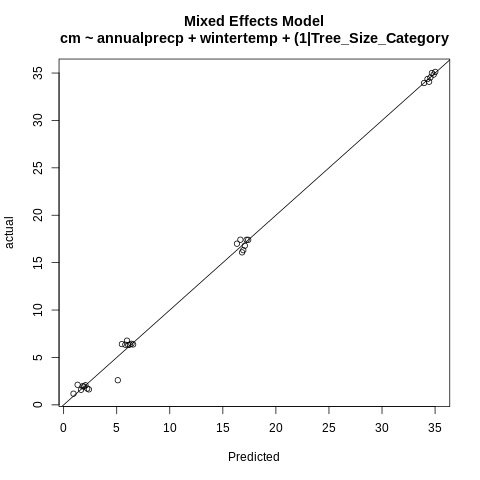

In [54]:
%%R
plot(predict(mixed_models[[9]]), df_cm$cm, xlab ='Predicted', ylab = 'actual', main = 'Mixed Effects Model\ncm ~ annualprecp + wintertemp + (1|Tree_Size_Category')
abline(a = 0, b = 1)

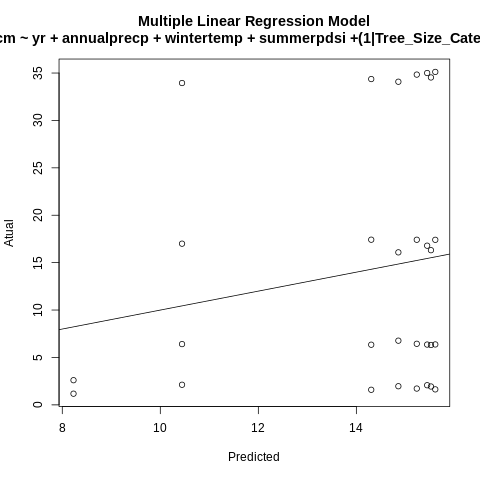

In [56]:
%%R
plot(predict(linear_models[[15]]), df_cm$cm, xlab ='Predicted', ylab = 'Atual', main = 'Multiple Linear Regression Model\ncm ~ yr + annualprecp + wintertemp + summerpdsi +(1|Tree_Size_Category')
abline(a = 0, b = 1)